In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/compu/.local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
sub_sample = pd.read_csv('./1587.csv')
fold_0 = pd.read_csv('./submission_fold_0_5.csv')
fold_1 = pd.read_csv('./submission_fold_1_5.csv')
fold_2 = pd.read_csv('./submission_fold_2_5.csv')
fold_3 = pd.read_csv('./submission_fold_3_5.csv')
fold_4 = pd.read_csv('./submission_fold_4_5.csv')

train_y = np.load("../FE/y_train.npy")

In [15]:
median_ens = np.median(np.array([
    sub_sample.pressure.values,
     
]), axis=0)

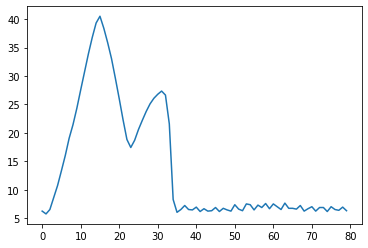

In [40]:
plt.plot(train_y[3])

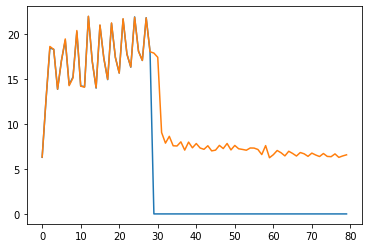

In [56]:
idx = 4
plt.plot(median_ens.reshape(-1, 80)[idx])
plt.plot(sub_sample.pressure.values.reshape(-1, 80)[idx])

In [6]:
train_y = np.load("../FE/y_train.npy")
y_uni = np.unique(train_y)

def get_th(y_uni):
    '''
    return array shape is (2, 950) -> first axis is from ~ to
    '''
    m_ = (np.roll(y_uni, -1) + y_uni) / 2
    to_m = m_
    from_m = np.roll(m_, 1)
    from_m[0] = np.NINF
    to_m[-1] = np.Inf

    return np.array([from_m, to_m])

y_th = get_th(y_uni)

def map_th(y, y_th, y_uni):
    uid = np.where((y_th[0, :] <= y)  & (y < y_th[1, :]))[0]
    result = y_uni[uid]
    return result[0]

post_result = sub_sample.pressure.map(lambda x : map_th(x, y_th, y_uni))

In [5]:
post_result.shape

(4024000,)

In [7]:
post_result

0          6.259305
1          5.978096
2          7.173232
3          7.735650
4          9.211995
             ...   
4023995    6.189002
4023996    6.259305
4023997    6.470211
4023998    6.189002
4023999    6.259305
Name: pressure, Length: 4024000, dtype: float64

In [6]:
sub_sample.pressure.shape

(4024000,)

In [9]:
sub_sample.pressure = post_result

In [10]:
sub_sample.to_csv('./post_sub.csv', index=False)